In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
tablefile_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova"
tablefile_name = "TransientTable.csv"

tablefiles = [os.path.join(tablefile_dir, event_dir, tablefile_name) for event_dir in os.listdir(tablefile_dir) if os.path.exists(os.path.join(tablefile_dir, event_dir, tablefile_name) )]

print("\n".join(tablefiles))

/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190901ap_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910h_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930s_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930t_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191109d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191110x_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191212q_rev_1/TransientTable.csv
/mnt/c/Users/Public/Doc

In [4]:
data = pd.DataFrame()

for file in tablefiles:
    #print(file)
    df_tmp = pd.read_csv(file, sep=";")
    df_tmp["kn-1000-rate"] = np.array([np.count_nonzero(df_tmp["Kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["Kilonovaness"]]) / df_tmp["Map area"] * 1000


    data = pd.concat([data, df_tmp])

data.head(2)

,Unnamed: 0,Ampel z,Ampel z (precision),Ampel distance,Peak absmag (Possis),Fit chisq (Possis),Fit ndof (Possis),Kilonovaness,Rejects,Kilonovaness/Number of Checks,...,Mag. sigma diff. in fid 1,Mag. sigma diff. in fid 2,Map area,Map dist,Map dist unc,Map name,stock,ztf_id,channels,kn-1000-rate
0,9,0.090,0.02,0.993899,-17.211575,0.01476,0.0,24,"('ampel_dist', 'PS1_photoz', 'SDSSDR10', 'TNS'...",0.800000,...,NaN,NaN,13612.923279,242.203653,81.005098,"S190901ap.fits.gz,0",356867970,ZTF19abwvals,ligo,0.07346
1,0,0.061,0.02,4.261853,-16.461981,1.30059,0.0,23,"('PS1_photoz', 'TNS', 'wiseScosPhotoz', 'age',...",0.766667,...,1.383584,NaN,13612.923279,242.203653,81.005098,"S190901ap.fits.gz,0",346052626,ZTF19abvionh,ligo,0.07346


  Kilonovaness  rate-1000  std-1000 entries
0            1   4.410918  2.986426      16
0            3   0.500529  0.000000       1
0            6   0.380845  0.119684       2
0            8   0.416815  0.255506       2
0            9   2.154329  1.349774       9


/tmp/ipykernel_328/3087278670.py:77: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


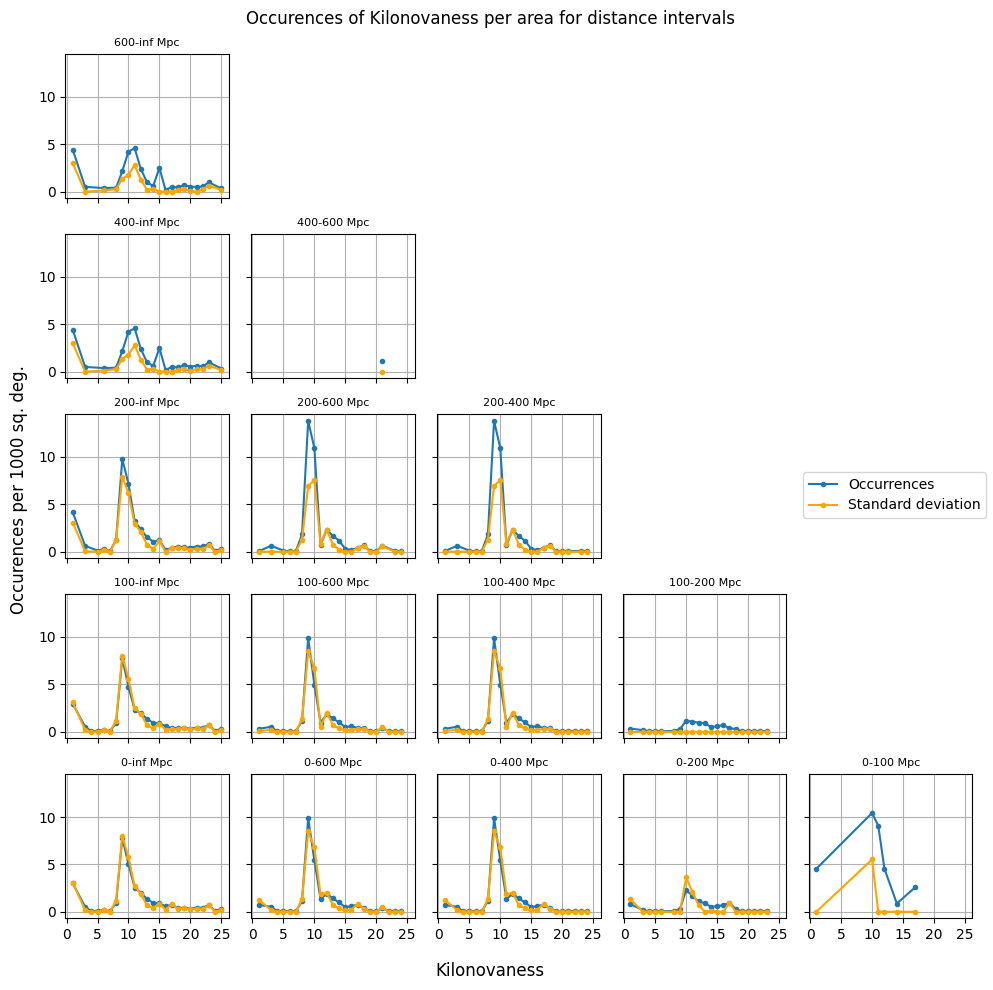

In [29]:
distance_mins = [0, 100, 200, 400, 600]
distance_maxs = [100, 200, 400,600, np.inf]
n = len(distance_mins)
m = len(distance_maxs)

binned_data = np.empty((n, m), dtype=pd.DataFrame)

#print(binned_data)

for k in range(n):
    for j in range(k, m):

        dist_min = distance_mins[k]
        dist_max = distance_maxs[j]
        #print(f"From {dist_min} to {dist_max} Mpc")


        kilonovaness_rate = pd.DataFrame(columns=["Kilonovaness", "rate-1000", "std-1000", "entries"])
        #print(kilonovaness_rate.head())
        #print(data["Kilonovaness"].unique())

        lim_data = data[np.logical_and(data["Map dist"] >= dist_min, data["Map dist"] <= dist_max)]

        for kilonovaness in lim_data["Kilonovaness"].unique():
            #print(kilonovaness)
            tmp = lim_data[lim_data["Kilonovaness"] == kilonovaness]

            data_dict = {"Kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)]}
            #print(data_dict)
            mini_tmp = pd.DataFrame.from_dict(data_dict)

            kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
            kilonovaness_rate = kilonovaness_rate.sort_values(by=["Kilonovaness"], ascending=True)
        
        binned_data[k, j] = kilonovaness_rate
        
        # print(kilonovaness_rate)

print(kilonovaness_rate.head(5))

#print(binned_data)

fig, axs = plt.subplots(ncols=m, nrows=n, figsize=(10, 10),
                        layout="constrained", sharex=True, sharey=True, subplot_kw={"xticks": [0, 5, 10, 15, 20, 25], "yticks": [0, 5, 10, 15]})
# fill plots
for row in range(n):
    for col in range(m):
        if (binned_data[row, col] is not None):
            #print()
            axs[-row-1, -col-1].plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["rate-1000"], marker=".", label="Occurrences")
            #secax_x2 = axs[-row-1, -col-1].twinx()
            axs[-row-1, -col-1].plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange", label="Standard deviation")
            #secax_x2.plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange")
            axs[-row-1, -col-1].set_title(f"{distance_mins[row]}-{distance_maxs[col]} Mpc", fontsize=8)
            axs[-row-1, -col-1].grid()
        else:
            axs[-row-1, -col-1].set_visible(False)
        #pass

handles, labels = axs[-row-1, -col-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

fig.suptitle('Occurences of Kilonovaness per area for distance intervals')
fig.supxlabel("Kilonovaness")
fig.supylabel("Occurences per 1000 sq. deg.", ha="left")

# dummy axes 2 for right ylabel
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xticks([])
# ax.set_yticks([])
# [ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
# ax.patch.set_visible(False)
# ax.yaxis.set_label_position('right')
# ax.set_ylabel('Standard deviation', labelpad=30, fontsize=12)


fig.tight_layout()
plt.show()
